# Turn-over analysis

DAILLE Thomas, M2 MIAGE ID Apprentissage

**Data :** IBM Human ressources

**Context :**  How can data analysis be used to anticipate the departure of an employee in order to reduce turnover in an organization?

In [ ]:
# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import *
from sklearn.metrics import precision_recall_curve, roc_curve
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [ ]:
# load data
data = pd.read_csv("dataset.csv",sep=",")

## 1. Exploratory Data analysis (EDA) 
### 1.1 Dataset discovery

In [ ]:
# sample data
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
# sample size
data.shape

(1470, 35)

In [ ]:
# metadatas
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
# basic statistics  
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
# discovery of the number of distinct values per varible
uniqueValue_df = pd.DataFrame({'Column':[], 'Unique value number':[]})

for column in data.columns:
  new_row = {'Column':column, 'Unique value number':data[column].nunique()}
  uniqueValue_df = uniqueValue_df.append(new_row, ignore_index=True)

display(uniqueValue_df)

,Column,Unique value number
0,Age,43.0
1,Attrition,2.0
2,BusinessTravel,3.0
3,DailyRate,886.0
4,Department,3.0
5,DistanceFromHome,29.0
6,Education,5.0
7,EducationField,6.0
8,EmployeeCount,1.0
9,EmployeeNumber,1470.0


**Note:**

'EmployeeCount', 'Over18', 'StandardHours' have only one unique value and 'EmployeeNumber' has 1470 unique values. These features are not useful for us, so we will drop these columns.

In [ ]:
# drop columns
data.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)

In [ ]:
# new sample
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [ ]:
# duplicate discovery
data.duplicated().sum()

0

In [ ]:
# missing values discovery
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

**Note :**

No null values and duplicates.

### 1.2 Exploration of the dataset

In [ ]:
# activate seaborn’s theme
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

In [ ]:
# Prints the correlation matrix of a dataframe
def correlation_matrix(df):
  plt.figure(figsize=(20, 20))
  sns.heatmap(df.corr(),  center=0, cmap='RdBu', linewidths=1, annot=True, fmt=".2f", vmin=-1,vmax=1)
  plt.title('Matrice de corrélation', fontsize = 18)
  plt.show()

In [ ]:
# descriptive analysis of quantitative variables
def quantitative_exploration(variable):

  print("\n==========================================")
  print(variable + ":")

  print("Minimum: "+str(data[variable].min())+", Maximum: "+str(data[variable].max())+", Mean: "+str(round(data[variable].mean(), 2))+", Std: "+str(round(data[variable].std(),2))+"\n")

  fig, axes = plt.subplots(1, 2, figsize=(16, 4))

  a = sns.boxplot(ax = axes[0], x = data[variable])
  a.axes.set_title(variable + " boxplot", pad=15, fontsize=20)
  a.set_xlabel(variable, labelpad=15, fontsize=15)

  b = sns.histplot(data = data, x = variable, hue="Attrition", multiple="dodge", shrink=0.9)
  b.axes.set_title(variable + " distribution by Attrition", pad=15, fontsize=20)
  b.set_xlabel(variable, labelpad=15, fontsize=15)
  b.set_ylabel("Count", labelpad=15, fontsize=15)
 
  plt.show()

In [ ]:
# descriptive analysis of categorical variables
def qualitative_exploration(variable):

  print("\n==========================================")
  print(variable + ":\n")

  plt.figure(figsize = (18,6))
  b = sns.histplot(data=data, x=variable, hue="Attrition", multiple="dodge", shrink=0.9)
  b.axes.set_title("Attrition by "+variable, pad=20, fontsize=28)
  b.set_xlabel(variable, labelpad=20, fontsize=20)
  b.set_ylabel("Count", labelpad=20, fontsize=20)
  b.tick_params(labelsize=11)
  plt.setp(b.get_legend().get_title(), fontsize='20')
  plt.setp(b.get_legend().get_texts(), fontsize='16')
  b.get_legend().get_frame().set_facecolor('white')

  # adding labels to bars
  rects = b.patches

  for rect in rects:
    height = rect.get_height()
    b.text(rect.get_x() + rect.get_width() / 2, height+4, height,
            ha='center', va='bottom')
    
  plt.show()

  df_mask=data['Attrition']=="Yes"
  filtered_df = data[df_mask]
  serie = round(filtered_df[variable].value_counts() / data[variable].value_counts(),4) * 100
  df = serie.to_frame(name="frequency of attrition (%)").sort_values("frequency of attrition (%)", ascending = False)
  display(df)

In [ ]:
# distinction between qualitative and quantitative variables
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('Attrition')

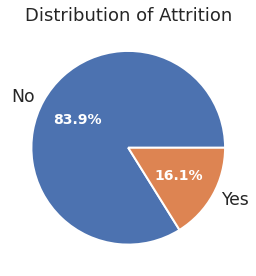

No     1233
Yes     237
Name: Attrition, dtype: int64


In [ ]:
# 'Attrition' distribution
fig, ax = plt.subplots(figsize=(4, 4))

x = data['Attrition'].value_counts()
labels = ["No", "Yes"]

patches, texts, pcts = ax.pie(
    x, labels=labels, autopct='%.1f%%',
    wedgeprops={'linewidth': 2.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large'})

plt.setp(pcts, color='white', fontweight='bold', fontsize = 14)
ax.set_title('Distribution of Attrition', fontsize = 18)
plt.tight_layout()
plt.show()

print(data['Attrition'].value_counts())


Age:
Minimum: 18, Maximum: 60, Mean: 36.92, Std: 9.14



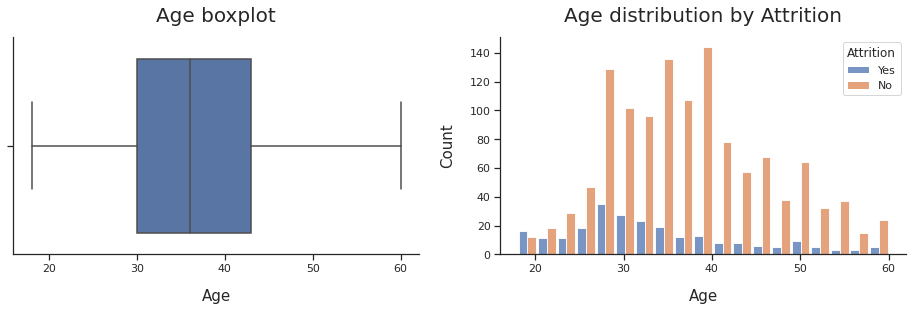


DailyRate:
Minimum: 102, Maximum: 1499, Mean: 802.49, Std: 403.51



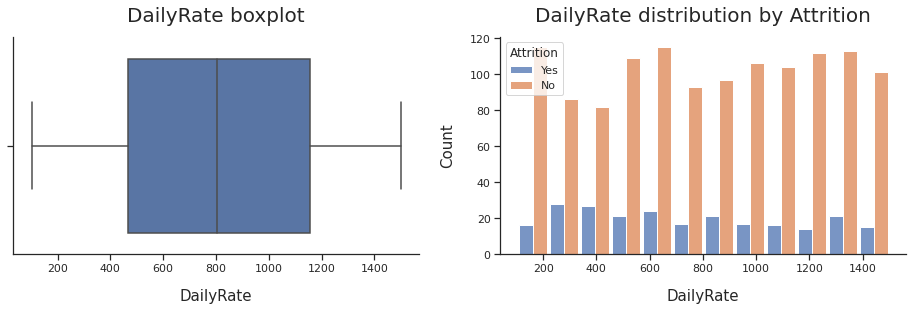


DistanceFromHome:
Minimum: 1, Maximum: 29, Mean: 9.19, Std: 8.11



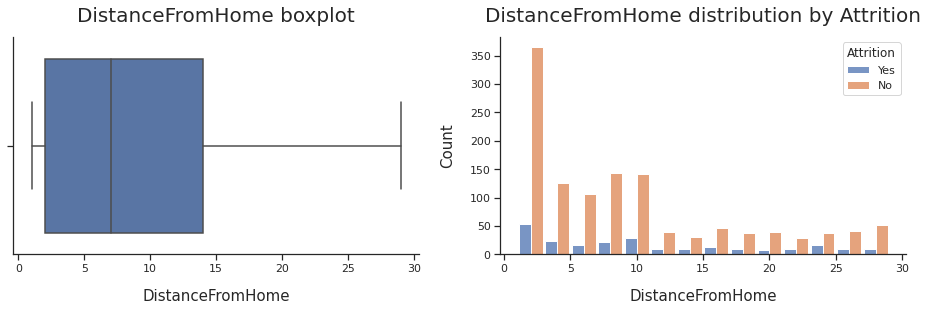


Education:
Minimum: 1, Maximum: 5, Mean: 2.91, Std: 1.02



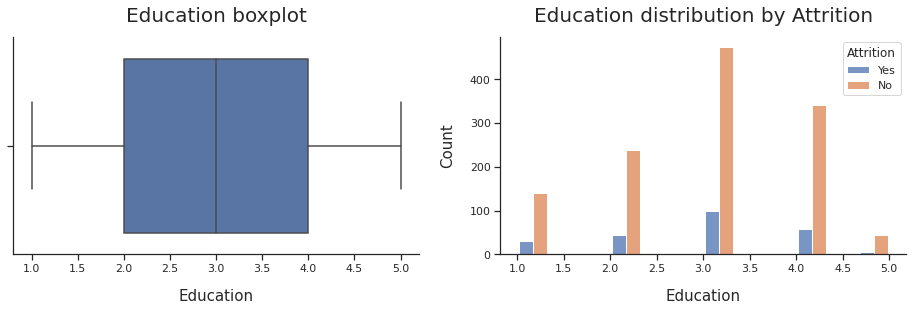


EnvironmentSatisfaction:
Minimum: 1, Maximum: 4, Mean: 2.72, Std: 1.09



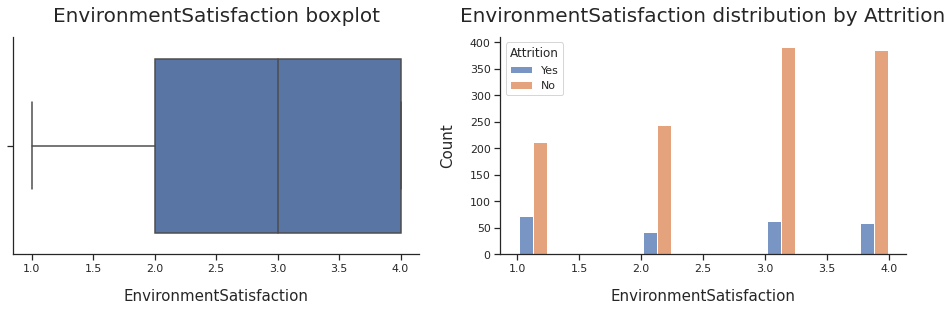


HourlyRate:
Minimum: 30, Maximum: 100, Mean: 65.89, Std: 20.33



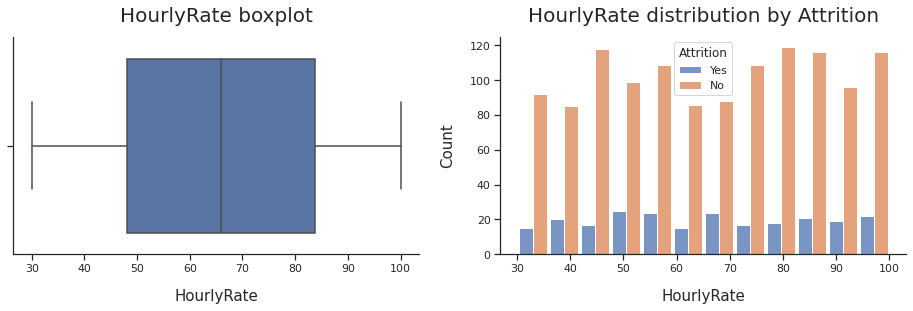


JobInvolvement:
Minimum: 1, Maximum: 4, Mean: 2.73, Std: 0.71



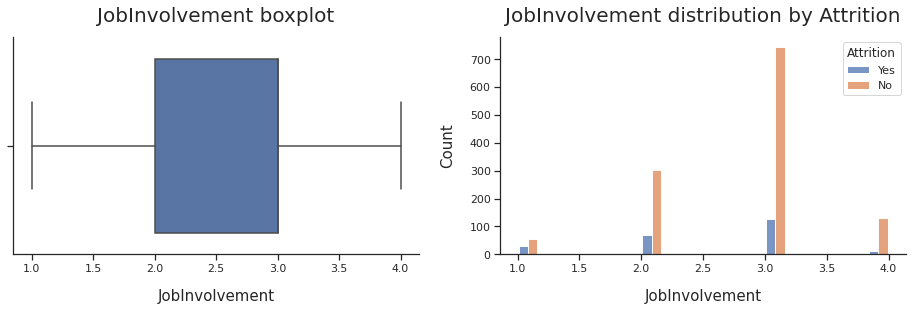


JobLevel:
Minimum: 1, Maximum: 5, Mean: 2.06, Std: 1.11



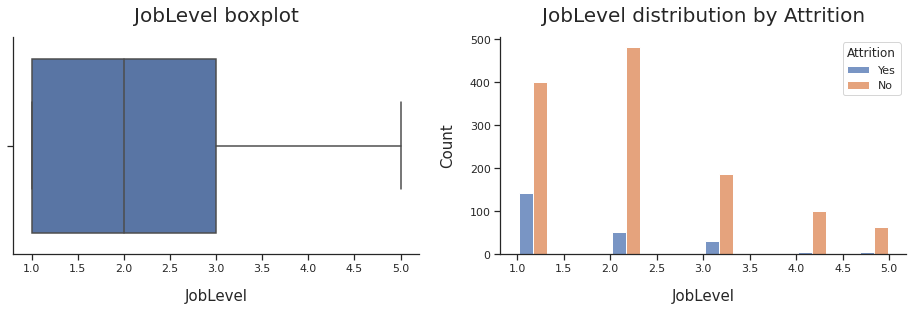


JobSatisfaction:
Minimum: 1, Maximum: 4, Mean: 2.73, Std: 1.1



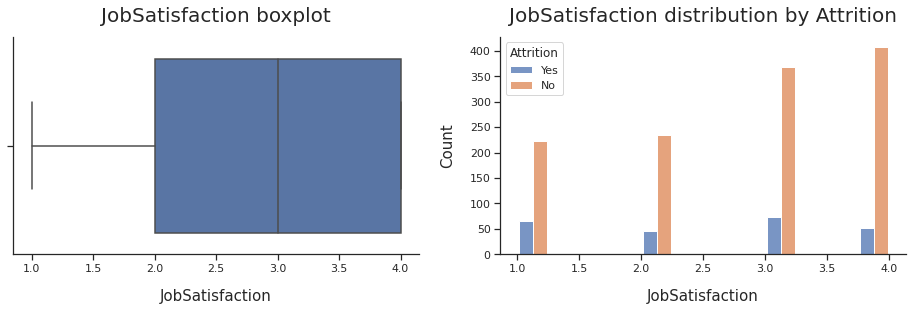


MonthlyIncome:
Minimum: 1009, Maximum: 19999, Mean: 6502.93, Std: 4707.96



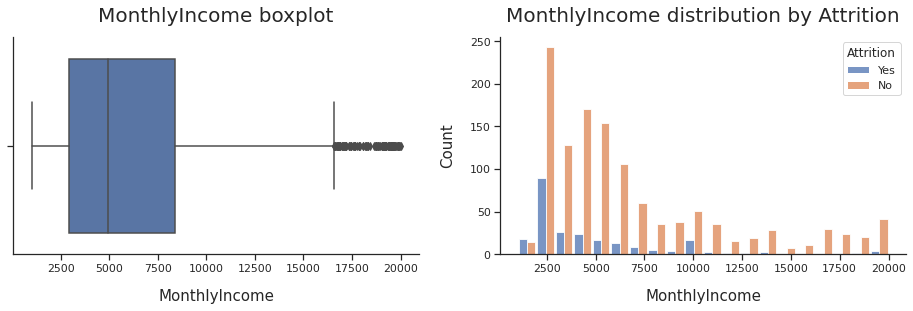


MonthlyRate:
Minimum: 2094, Maximum: 26999, Mean: 14313.1, Std: 7117.79



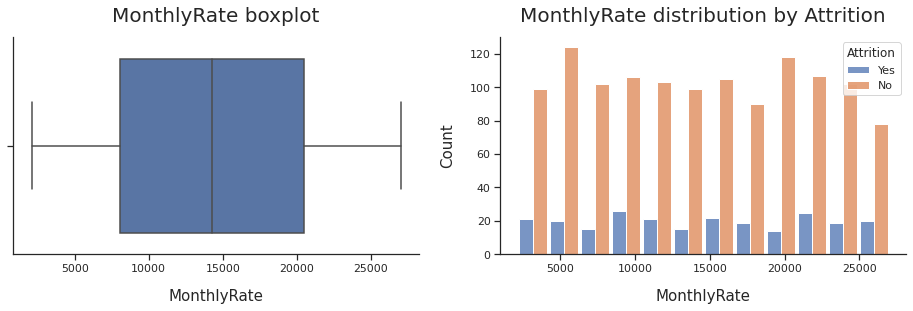


NumCompaniesWorked:
Minimum: 0, Maximum: 9, Mean: 2.69, Std: 2.5



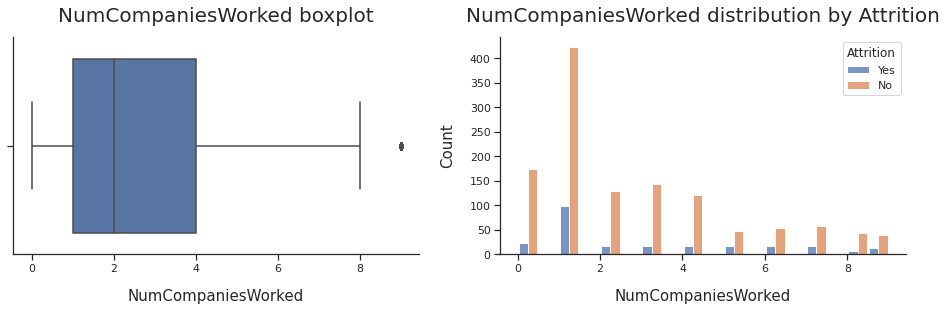


PercentSalaryHike:
Minimum: 11, Maximum: 25, Mean: 15.21, Std: 3.66



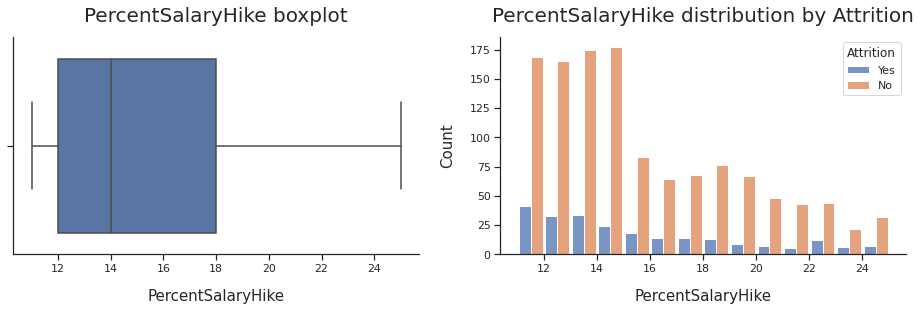


PerformanceRating:
Minimum: 3, Maximum: 4, Mean: 3.15, Std: 0.36



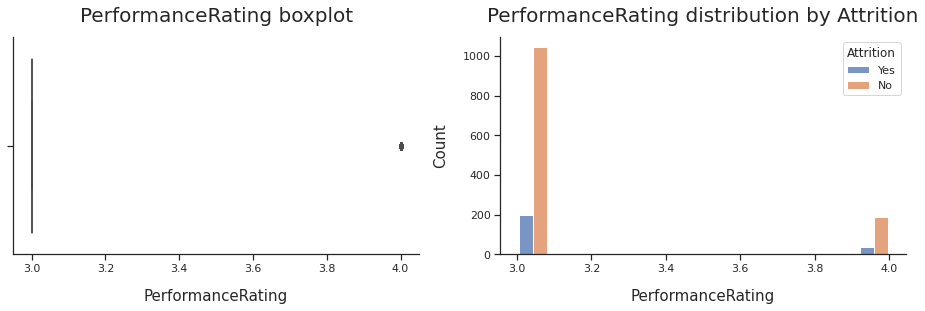


RelationshipSatisfaction:
Minimum: 1, Maximum: 4, Mean: 2.71, Std: 1.08



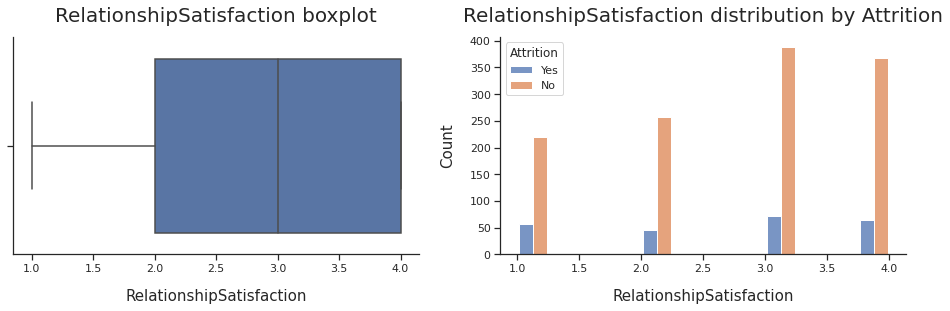


StockOptionLevel:
Minimum: 0, Maximum: 3, Mean: 0.79, Std: 0.85



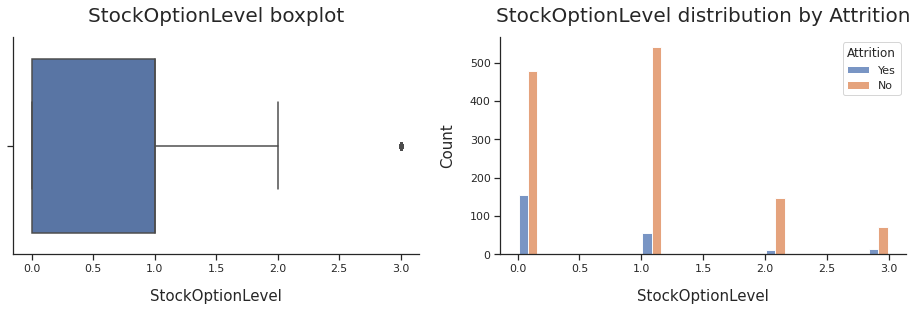


TotalWorkingYears:
Minimum: 0, Maximum: 40, Mean: 11.28, Std: 7.78



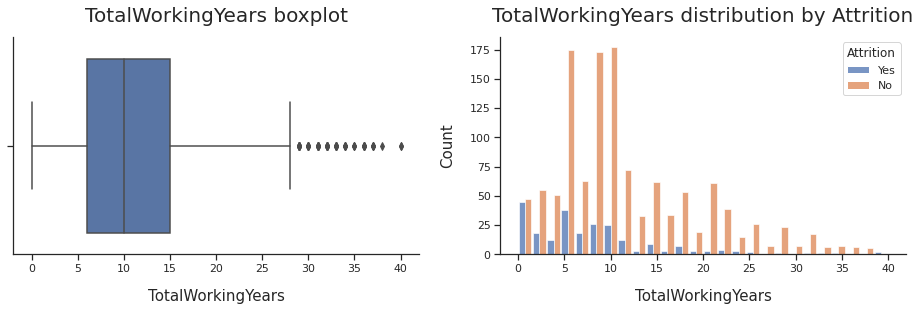


TrainingTimesLastYear:
Minimum: 0, Maximum: 6, Mean: 2.8, Std: 1.29



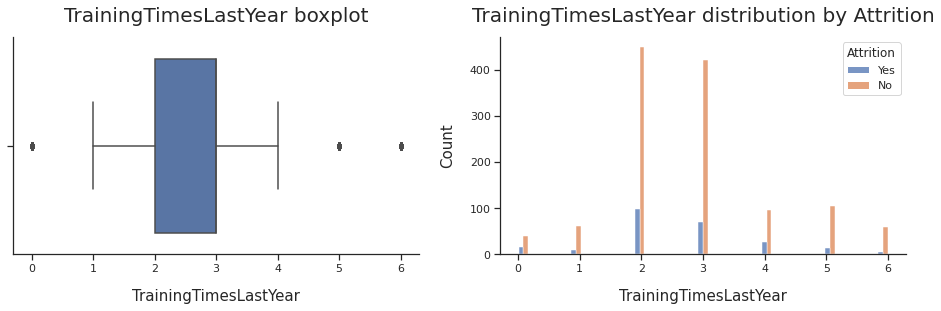


WorkLifeBalance:
Minimum: 1, Maximum: 4, Mean: 2.76, Std: 0.71



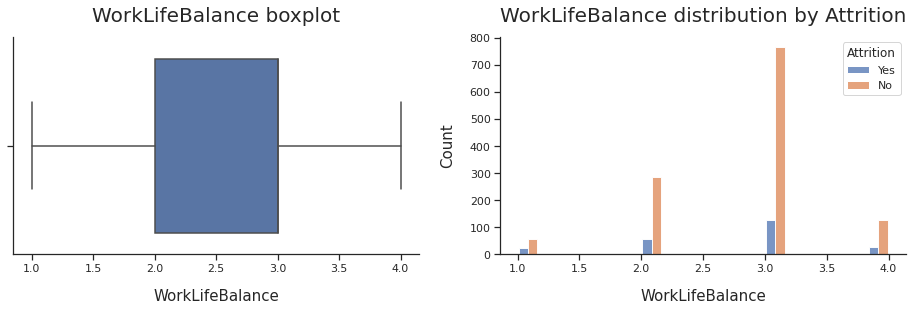


YearsAtCompany:
Minimum: 0, Maximum: 40, Mean: 7.01, Std: 6.13



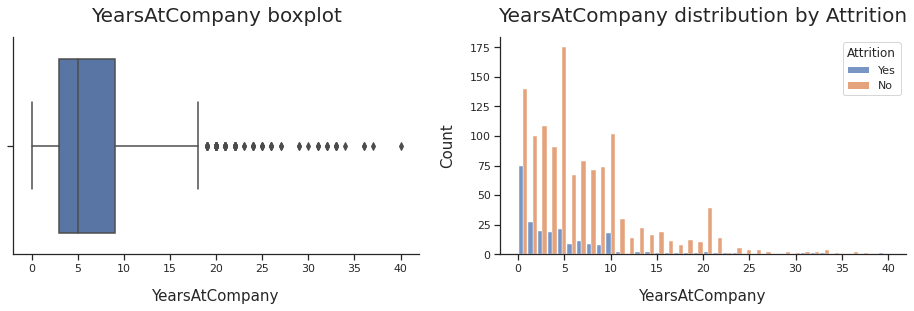


YearsInCurrentRole:
Minimum: 0, Maximum: 18, Mean: 4.23, Std: 3.62



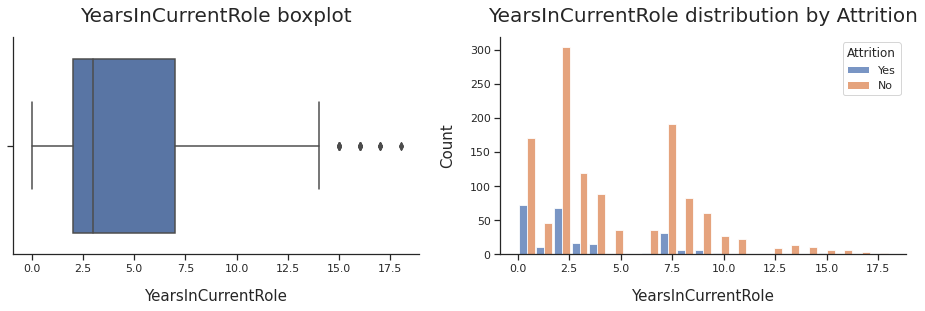


YearsSinceLastPromotion:
Minimum: 0, Maximum: 15, Mean: 2.19, Std: 3.22



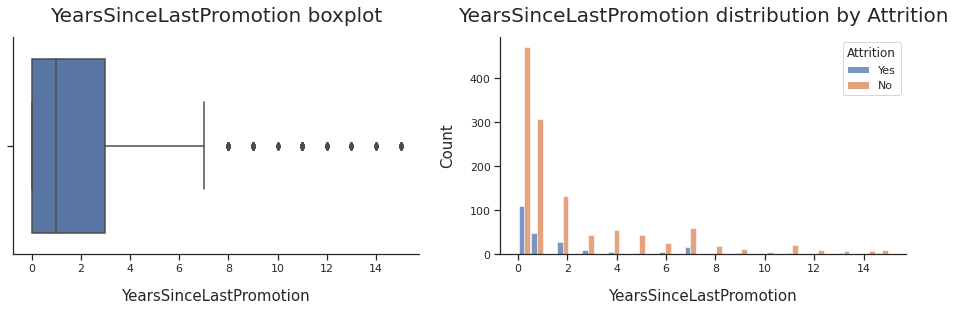


YearsWithCurrManager:
Minimum: 0, Maximum: 17, Mean: 4.12, Std: 3.57



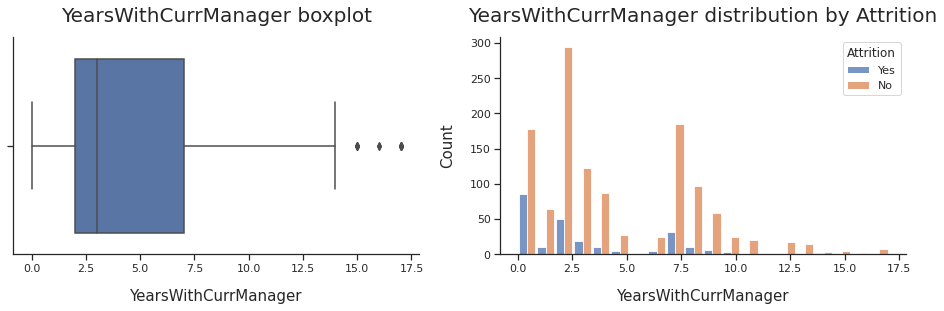

In [ ]:
# descriptive analysis of quantitative variables
for i in data[numeric_cols].columns:
  quantitative_exploration(i)


BusinessTravel:



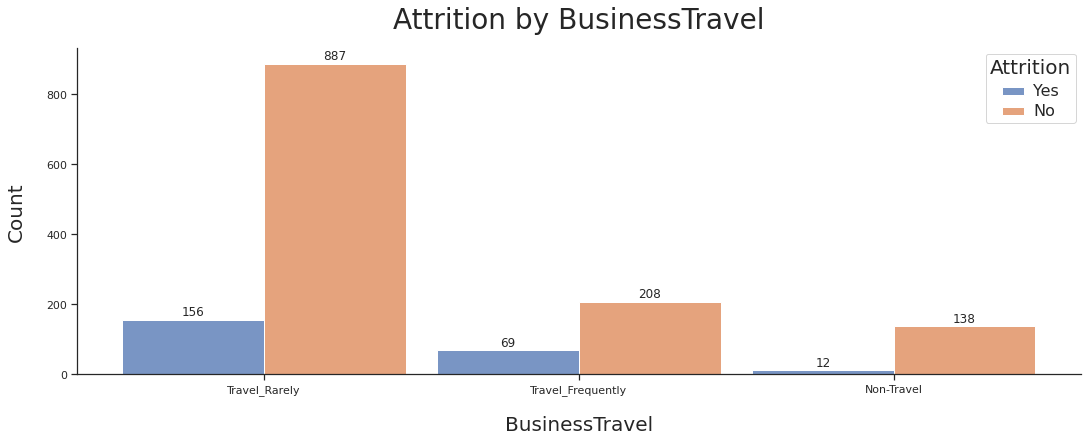

,frequency of attrition (%)
Travel_Frequently,24.91
Travel_Rarely,14.96
Non-Travel,8.00



Department:



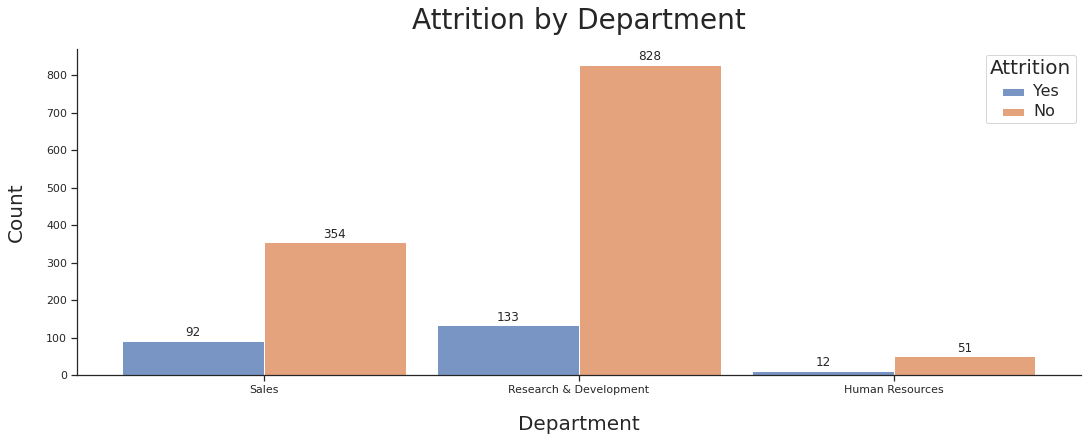

,frequency of attrition (%)
Sales,20.63
Human Resources,19.05
Research & Development,13.84



EducationField:



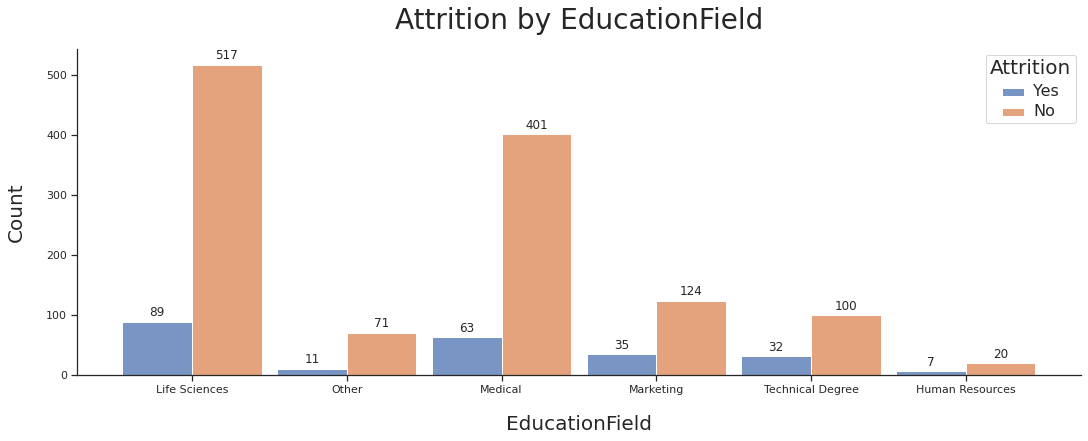

,frequency of attrition (%)
Human Resources,25.93
Technical Degree,24.24
Marketing,22.01
Life Sciences,14.69
Medical,13.58
Other,13.41



Gender:



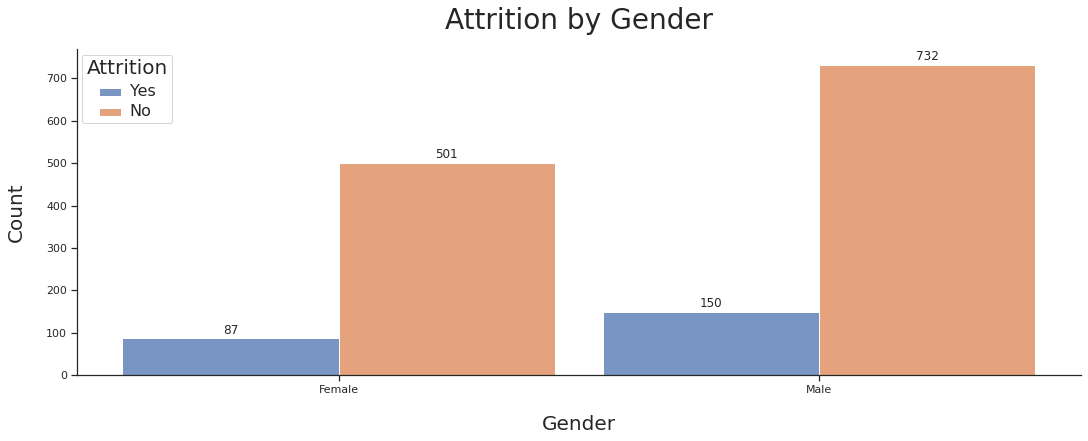

,frequency of attrition (%)
Male,17.01
Female,14.80



JobRole:



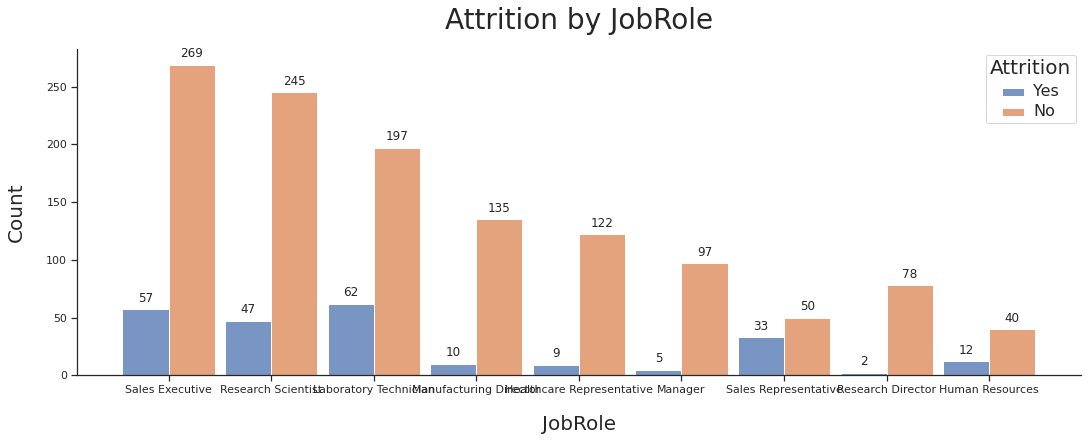

,frequency of attrition (%)
Sales Representative,39.76
Laboratory Technician,23.94
Human Resources,23.08
Sales Executive,17.48
Research Scientist,16.10
Manufacturing Director,6.90
Healthcare Representative,6.87
Manager,4.90
Research Director,2.50



MaritalStatus:



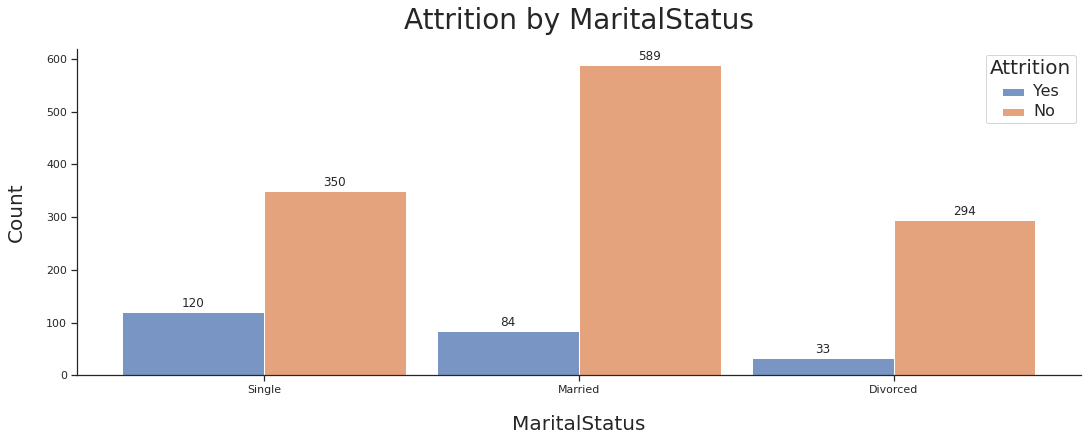

,frequency of attrition (%)
Single,25.53
Married,12.48
Divorced,10.09



OverTime:



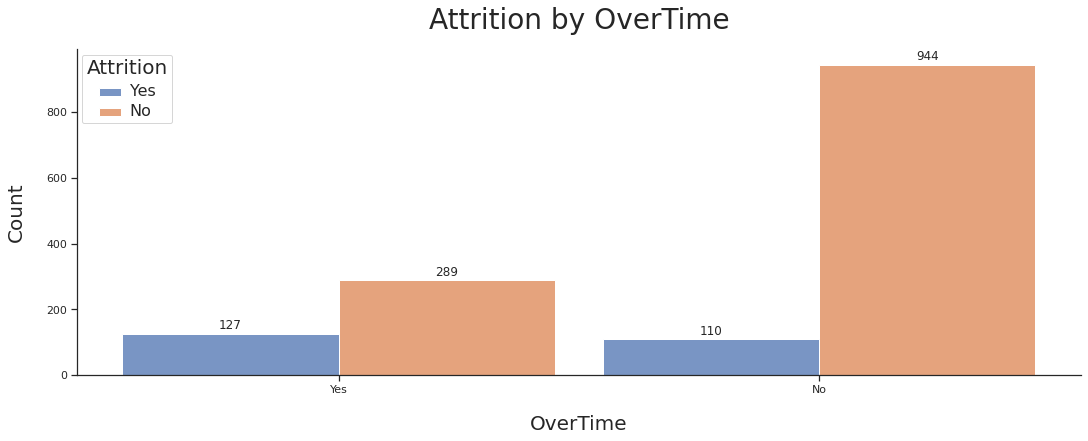

,frequency of attrition (%)
Yes,30.53
No,10.44


In [ ]:
# descriptive analysis of qualitative variables
for i in data[categorical_cols].columns:
  qualitative_exploration(i)

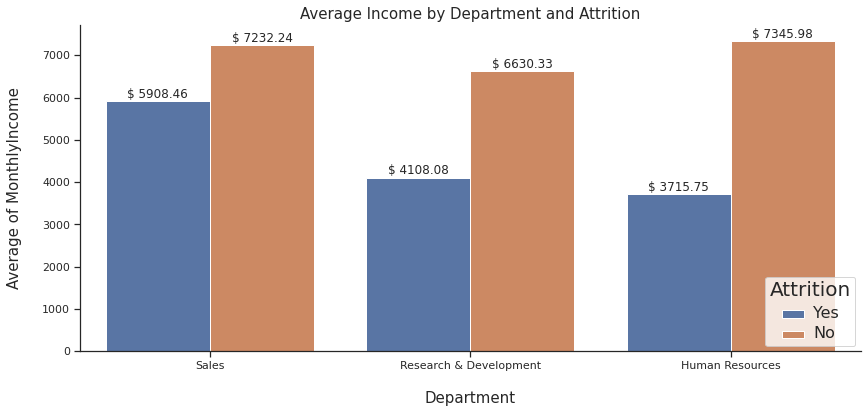

In [ ]:
# Average Income by Departments
plt.figure(figsize = (14,6))
b = sns.barplot(y='MonthlyIncome', x='Department', data=data, hue="Attrition", ci=None)
plt.xlabel('Department', labelpad=20, fontsize=15)
plt.ylabel('Average of MonthlyIncome', labelpad=20, fontsize=15)
plt.title('Average Income by Department and Attrition', fontsize=15)
plt.legend(loc='lower right', title='Attrition')
plt.setp(b.get_legend().get_title(), fontsize='20')
plt.setp(b.get_legend().get_texts(), fontsize='16')
b.get_legend().get_frame().set_facecolor('white')

rects = b.patches

for rect in rects:
  height = round(rect.get_height(),2)
  b.text(rect.get_x() + rect.get_width() / 2, height+4, "$ "+str(height), ha='center', va='bottom')
    
plt.show()

**Note :**

- Workers with low 'JobLevel', 'MonthlyIncome', 'YearAtCompany' and 'TotalWorkingYears' are more likely to leave their jobs. 

- 'Business travel': Workers who travel a lot are more likely to leave their jobs than other employees.

- 'Department': Workers in Research and Development are more likely to stay than workers in other departments.

- 'EducationField': Workers with a human resources degree and a technical degree are more likely to quit than employees in other education fields.

- 'Gender': Men are more likely to quit.

- 'JobRole': Workers in the Laboratory Technician, Sales Representative and Human Resources categories are more likely to quit than workers in other categories.

- 'MaritalStatus': Workers who have a single marital status are more likely to quit than those who are married or divorced.

- 'OverTime': Workers who work longer hours are more likely to quit than others.

# Correlation matrix 
This matrix measures the degree of linear relationship that exists between each pair of variables.

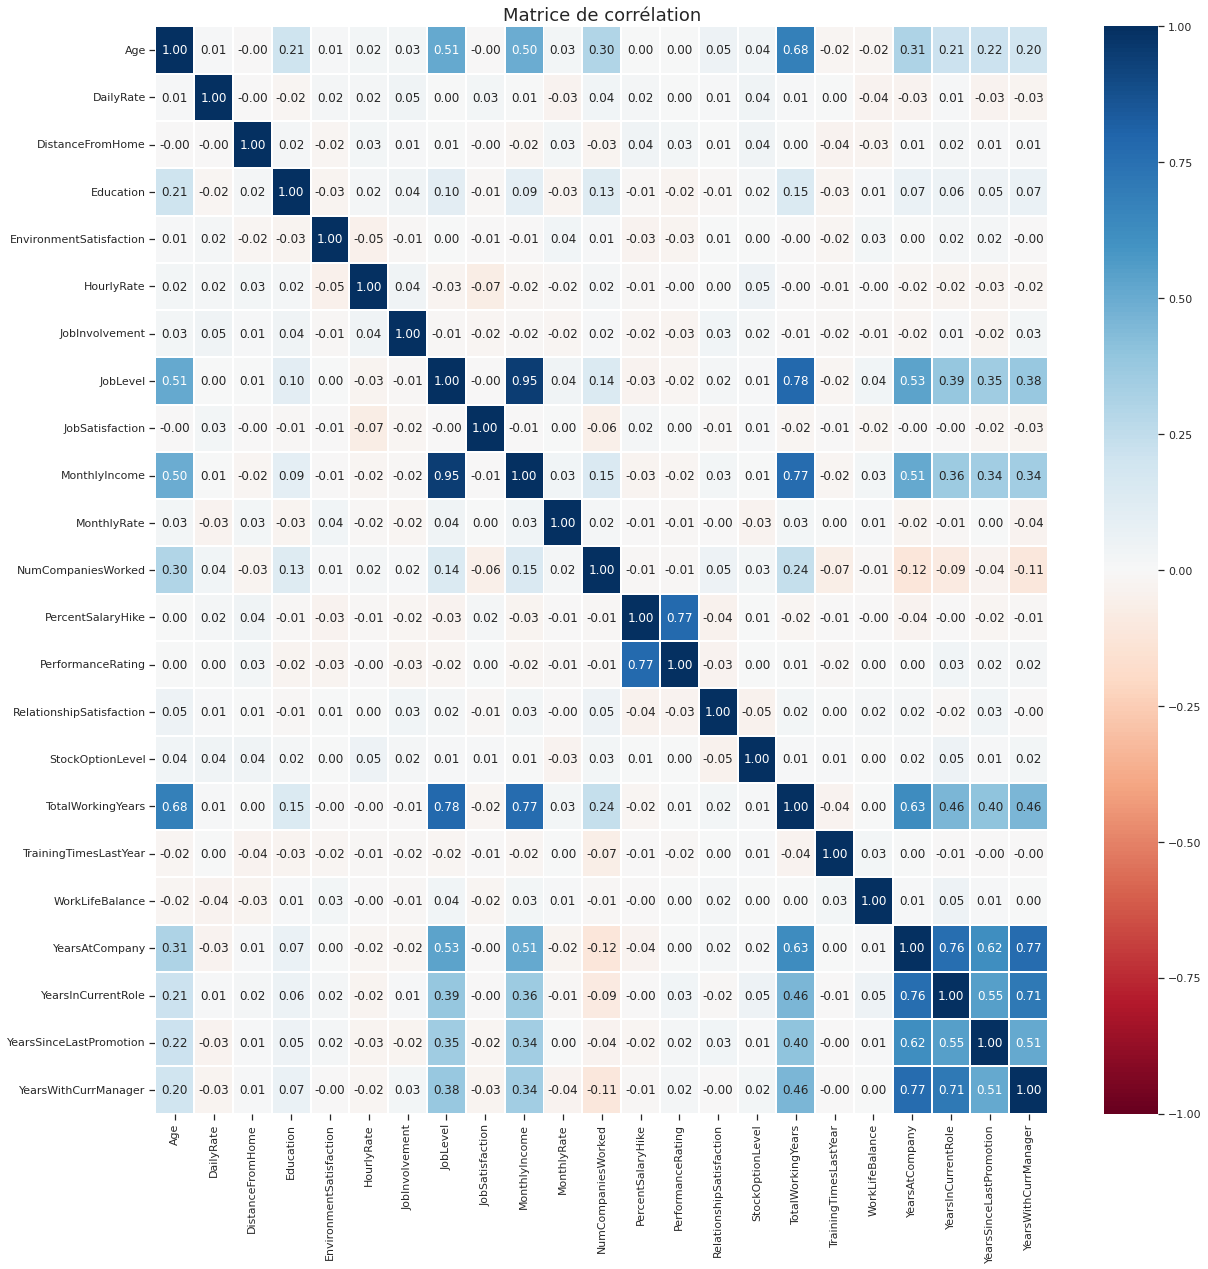

In [ ]:
correlation_matrix(data)

**Notes :**

- Monthly income is strongly correlated with the level of employment.

- The level of employment is strongly correlated with the total number of hours worked.

- Monthly income is strongly correlated with total working time.

- Age is also positively correlated with total working time.

- Marital status and stock option level are negatively correlated.

# Data processing


In [ ]:
# sample data
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [ ]:
# attrition encoding
data["Attrition"] = LabelEncoder().fit_transform(data['Attrition'])

# one-hot encoding for columns
dummy_col = [column for column in data.drop('Attrition', axis=1).columns if data[column].nunique() < 20]
data = pd.get_dummies(data, columns=dummy_col, drop_first=True, dtype='uint8')

# sample data
data.head()

,Age,Attrition,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,TotalWorkingYears,YearsAtCompany,BusinessTravel_Travel_Frequently,...,YearsWithCurrManager_8,YearsWithCurrManager_9,YearsWithCurrManager_10,YearsWithCurrManager_11,YearsWithCurrManager_12,YearsWithCurrManager_13,YearsWithCurrManager_14,YearsWithCurrManager_15,YearsWithCurrManager_16,YearsWithCurrManager_17
0,41,1,1102,1,94,5993,19479,8,6,0,...,0,0,0,0,0,0,0,0,0,0
1,49,0,279,8,61,5130,24907,10,10,1,...,0,0,0,0,0,0,0,0,0,0
2,37,1,1373,2,92,2090,2396,7,0,0,...,0,0,0,0,0,0,0,0,0,0
3,33,0,1392,3,56,2909,23159,8,8,1,...,0,0,0,0,0,0,0,0,0,0
4,27,0,591,2,40,3468,16632,6,2,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# sample size
data.shape

(1470, 136)

In [ ]:
# definition of the target variable
X = data.drop('Attrition', axis=1)
y = data.Attrition

# definition of the test set and the training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('\nTesting Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)


Training Features Shape: (1176, 135)
Training Labels Shape: (1176,)

Testing Features Shape: (294, 135)
Testing Labels Shape: (294,)


In [ ]:
# standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)
X_std = scaler.transform(X)

In [ ]:
# sample data
X_train.head()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,TotalWorkingYears,YearsAtCompany,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,...,YearsWithCurrManager_8,YearsWithCurrManager_9,YearsWithCurrManager_10,YearsWithCurrManager_11,YearsWithCurrManager_12,YearsWithCurrManager_13,YearsWithCurrManager_14,YearsWithCurrManager_15,YearsWithCurrManager_16,YearsWithCurrManager_17
1194,47,1225,2,47,15972,21086,29,3,0,1,...,0,0,0,0,0,0,0,0,0,0
128,22,594,2,100,2523,19299,3,2,0,1,...,0,0,0,0,0,0,0,0,0,0
810,46,406,3,52,17465,15596,23,12,0,1,...,0,1,0,0,0,0,0,0,0,0
478,25,622,13,40,2096,26376,7,7,0,1,...,0,0,0,0,0,0,0,0,0,0
491,43,1001,9,72,5679,19627,10,8,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# sample standardized data 
print(X_train_std)

[[ 1.09019402  1.04945488 -0.89991452 ... -0.05057217 -0.04127442
  -0.06534413]
 [-1.6348276  -0.52344929 -0.89991452 ... -0.05057217 -0.04127442
  -0.06534413]
 [ 0.98119316 -0.99208001 -0.77761018 ... -0.05057217 -0.04127442
  -0.06534413]
 ...
 [-1.6348276  -1.46320345 -0.16608847 ... -0.05057217 -0.04127442
  -0.06534413]
 [-0.10881549 -0.93225481 -0.89991452 ... -0.05057217 -0.04127442
  -0.06534413]
 [ 0.21818711 -0.09470203  1.30156365 ... -0.05057217 -0.04127442
  -0.06534413]]


In [ ]:
# return sorted feature importances of a model
def feature_imp(df, model):
    fi = pd.DataFrame()
    fi["feature"] = df.columns
    fi["importance"] = model.feature_importances_
    return fi.sort_values(by="importance", ascending=False)

In [ ]:
# draw the confusion matrix of a model
def plot_confusion_matrix(model, X_train, y_train, X_test, y_test):

  fig, axes = plt.subplots(1, 2, figsize=(16, 4))

  disp_train = ConfusionMatrixDisplay.from_estimator(model, X_train, y_train, ax = axes[0])
  axes[0].set_title("Train", pad=20, fontsize=20)

  disp_test = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, ax = axes[1])
  axes[1].set_title("Test", pad=20, fontsize=20)

  plt.show()

# retrun a dataframe with evaluation metrics
def evaluate(model,  X_train, y_train, X_test, y_test):

    df = pd.DataFrame({'model':[], 'jeu de données':[], 'precision':[], 'recall':[],  'accuracy':[],  'f1':[], 'AUC ROC':[]})

    y_test_pred = model.predict(X_test)

    # create the new ligne
    new_row = {'model':str(model).split('(')[0]
    , 'jeu de données':"test"
    , 'precision':round(precision_score(y_test, y_test_pred),2) 
    , 'recall':round(recall_score(y_test, y_test_pred),2) 
    , 'accuracy':round(accuracy_score(y_test, y_test_pred),2) 
    , 'f1':round(f1_score(y_test, y_test_pred),2)
    , 'AUC ROC':round(roc_auc_score(y_test, model.predict(X_test)),2)}

    #append row to the dataframe
    df = df.append(new_row, ignore_index=True)

    y_train_pred = model.predict(X_train)

    # create the new ligne
    new_row = {'model':str(model).split('(')[0]
    , 'jeu de données':"train"
    , 'precision':round(precision_score(y_train, y_train_pred),2) 
    , 'recall':round(recall_score(y_train, y_train_pred),2) 
    , 'accuracy':round(accuracy_score(y_train, y_train_pred),2) 
    , 'f1':round(f1_score(y_train, y_train_pred),2)
    , 'AUC ROC':round(roc_auc_score(y_train, model.predict(X_train)),2)}

    #append row to the dataframe
    df = df.append(new_row, ignore_index=True)

    return df

# draw the ROC curve
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')

# draw the PR curve
def plot_pr_curve(precisions,recalls):
  plt.plot(precisions, recalls)
  plt.xlabel("Precision")
  plt.ylabel("Recall")
  plt.title("PR Curve: precisions/recalls tradeoff");

# Establish a baseline 
Before we can make and evaluate predictions, we need to establish a baseline, a reasonable measure that we hope to beat with our model. If our model cannot improve on the baseline, it is a failure and we must try another model or admit that machine learning is not suitable for our problem. 


In [ ]:
# train accuracy
print("\n==========================================")
print("Jeu d'entrainement :")
print("==========================================\n")

stay = (y_train.value_counts()[0] / y_train.shape)[0]
leave = (y_train.value_counts()[1] / y_train.shape)[0]

print("Taux de restants : " + str(round(stay * 100,2)) + "%")
print("Taux de sortants : "+ str(round(leave * 100,2)) + "%")

# test accuracy
print("\n==========================================")
print("Jeu de test :")
print("==========================================\n")

stay = (y_test.value_counts()[0] / y_test.shape)[0]
leave = (y_test.value_counts()[1] / y_test.shape)[0]

print("Taux de restants : " + str(round(stay * 100,2)) + "%")
print("Taux de sortants : "+ str(round(leave * 100,2)) + "%")


Jeu d'entrainement :

Taux de restants : 83.84%
Taux de sortants : 16.16%

Jeu de test :

Taux de restants : 84.01%
Taux de sortants : 15.99%


# Logistic regression


Régression logistique :

Nombre d'observations du jeu d'entrainement : 1176
dont 190 collaborateurs qui sont partis.

Nombre d'observations du jeu de test: 294
dont 47 collaborateurs qui sont partis.

Matrice de confusion :



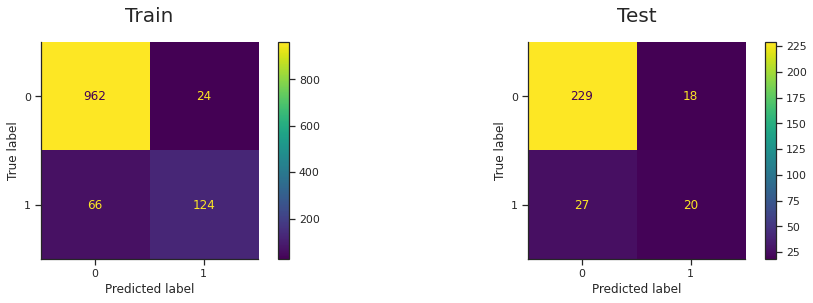

In [ ]:
print("\n==========================================")
print("Régression logistique :")
print("==========================================\n")

# create the model
logistic_model = LogisticRegression(solver='liblinear')

# train the model (we use standardized data)
logistic_model.fit(X_train_std, y_train)

# predict
y_train_pred = logistic_model.predict(X_train_std)
y_test_pred = logistic_model.predict(X_test_std)

print("Nombre d'observations du jeu d'entrainement : " + str(len(X_train_std)))
print("dont "+str(y_train.value_counts()[1])+" collaborateurs qui sont partis.")

print("\nNombre d'observations du jeu de test: " + str(len(X_test_std)))
print("dont "+str(y_test.value_counts()[1])+" collaborateurs qui sont partis.")

print("\nMatrice de confusion :\n")
plot_confusion_matrix(logistic_model, X_train_std, y_train, X_test_std, y_test)


Courbes d'évaluation  sur le jeu de test :



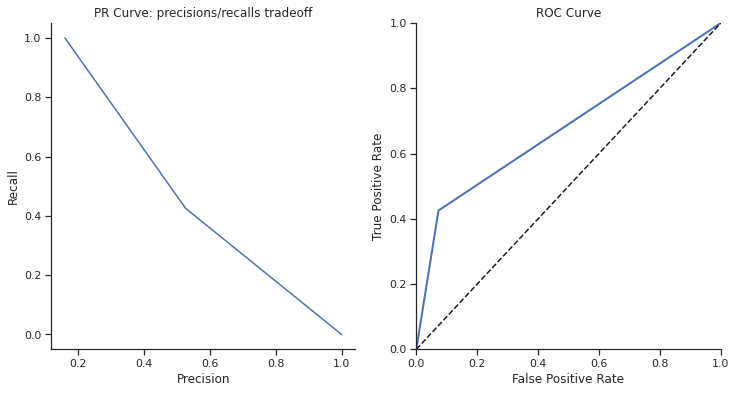


Métriques d'évaluation :



,model,jeu de données,precision,recall,accuracy,f1,AUC ROC
0,LogisticRegression,test,0.53,0.43,0.85,0.47,0.68
1,LogisticRegression,train,0.84,0.65,0.92,0.73,0.81


In [ ]:
# Evaluations 
print("\nCourbes d'évaluation  sur le jeu de test :\n")
precisions, recalls, thresholds = precision_recall_curve(y_test, logistic_model.predict(X_test_std))
fpr, tpr, thresholds = roc_curve(y_test, logistic_model.predict(X_test_std))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_pr_curve(precisions,recalls)

plt.subplot(1, 2, 2)
plot_roc_curve(fpr, tpr)
plt.show()

print("\nMétriques d'évaluation :\n")
logistic_df = evaluate(logistic_model, X_train_std, y_train, X_test_std, y_test)
display(logistic_df)
compare = logistic_df

# Random Forest


Random Forest :

Nombre d'observations du jeu d'entrainement : 1176
dont 190 collaborateurs qui sont partis.

Nombre d'observations du jeu de test: 294
dont 47 collaborateurs qui sont partis.

Matrice de confusion :



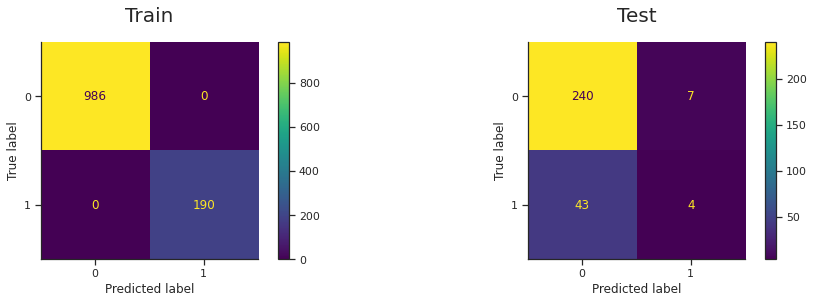


Métriques d'évaluation :



,model,jeu de données,precision,recall,accuracy,f1,AUC ROC
0,RandomForestClassifier,test,0.36,0.09,0.83,0.14,0.53
1,RandomForestClassifier,train,1.00,1.00,1.00,1.00,1.00


In [ ]:
print("\n==========================================")
print("Random Forest :")
print("==========================================\n")

# create the model
random_forest_model = RandomForestClassifier(n_estimators=1000, random_state = 42, bootstrap=False)

# train the model
random_forest_model.fit(X_train, y_train)

# predict
y_pred = random_forest_model.predict(X_test)

print("Nombre d'observations du jeu d'entrainement : " + str(len(X_train)))
print("dont "+str(y_train.value_counts()[1])+" collaborateurs qui sont partis.")

print("\nNombre d'observations du jeu de test: " + str(len(X_test)))
print("dont "+str(y_test.value_counts()[1])+" collaborateurs qui sont partis.")

print("\nMatrice de confusion :\n")
plot_confusion_matrix(random_forest_model, X_train, y_train, X_test, y_test)

print("\nMétriques d'évaluation :\n")
random_forest_model_df = evaluate(random_forest_model, X_train, y_train, X_test, y_test)
display(random_forest_model_df)

**Remarks :** 

Overfitting can be seen. If we optimise the model for the training data, our model will perform very well on the training set, but will not be able to generalise to new data, as in a test set. When a model performs very well on the training set but poorly on the test set, it is called overfitting, i.e. creating a model that knows the training set very well but cannot be applied to new problems. 

In [ ]:
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
print(random_forest_model.get_params())

Parameters currently in use:

{'bootstrap': False, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 1000, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


Fitting 5 folds for each of 648 candidates, totalling 3240 fits

Nombre d'observations du jeu d'entrainement : 1176
dont 190 collaborateurs qui sont partis.

Nombre d'observations du jeu de test: 294
dont 47 collaborateurs qui sont partis.

Matrice de confusion :



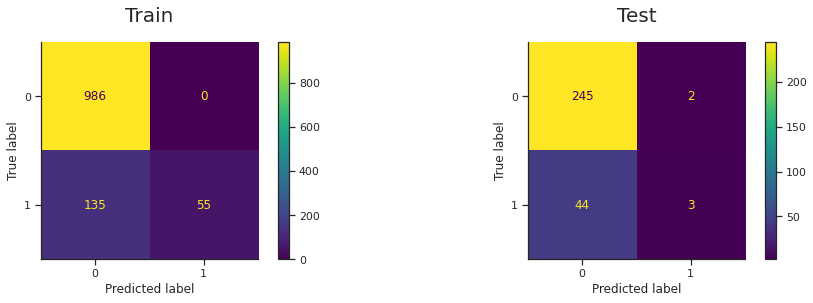


Métriques d'évaluation :



,model,jeu de données,precision,recall,accuracy,f1,AUC ROC
0,RandomForestClassifier,test,0.6,0.06,0.84,0.12,0.53
1,RandomForestClassifier,train,1.0,0.29,0.89,0.45,0.64


In [ ]:
# parameter grid
param_grid = dict(
    n_estimators= [100, 500, 900], 
    max_features= ['auto', 'sqrt'],
    max_depth= [2, 3, 5, 10, 15, None], 
    min_samples_split= [2, 5, 10],
    min_samples_leaf= [1, 2, 4], 
    bootstrap= [True, False]
) 

# find the best hyper parameters (46min)
best_random_forest_model = RandomForestClassifier(random_state=42)
search = GridSearchCV(best_random_forest_model, param_grid=param_grid, scoring='roc_auc', cv=5, verbose=1, n_jobs=-1)
search.fit(X_train, y_train)

# create the model with best hyper-parameters
best_random_forest_model = RandomForestClassifier(**search.best_params_, random_state=42)

# train the model
best_random_forest_model.fit(X_train, y_train)

# predict
y_pred = best_random_forest_model.predict(X_test)

print("\nNombre d'observations du jeu d'entrainement : " + str(len(X_train)))
print("dont "+str(y_train.value_counts()[1])+" collaborateurs qui sont partis.")

print("\nNombre d'observations du jeu de test: " + str(len(X_test)))
print("dont "+str(y_test.value_counts()[1])+" collaborateurs qui sont partis.")

print("\nMatrice de confusion :\n")
plot_confusion_matrix(best_random_forest_model, X_train, y_train, X_test, y_test)

print("\nMétriques d'évaluation :\n")
best_random_forest_model_df = evaluate(best_random_forest_model, X_train, y_train, X_test, y_test)
display(best_random_forest_model_df)

In [ ]:
# Look at parameters used by our best forest
print('Parameters currently in use:\n')
print(best_random_forest_model.get_params())

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 4, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}



Courbes d'évaluation :



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


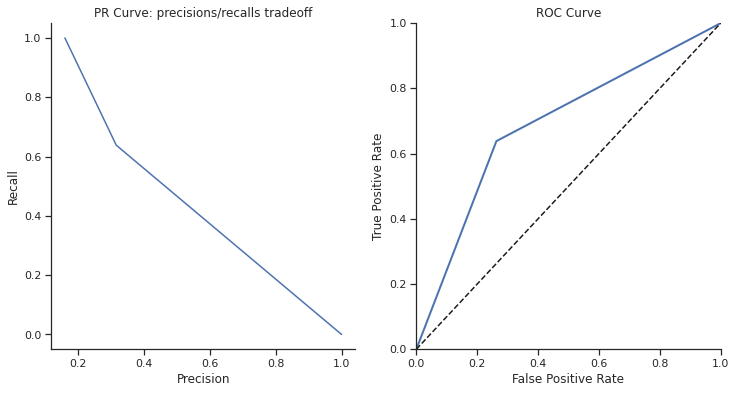


Importance des variables :



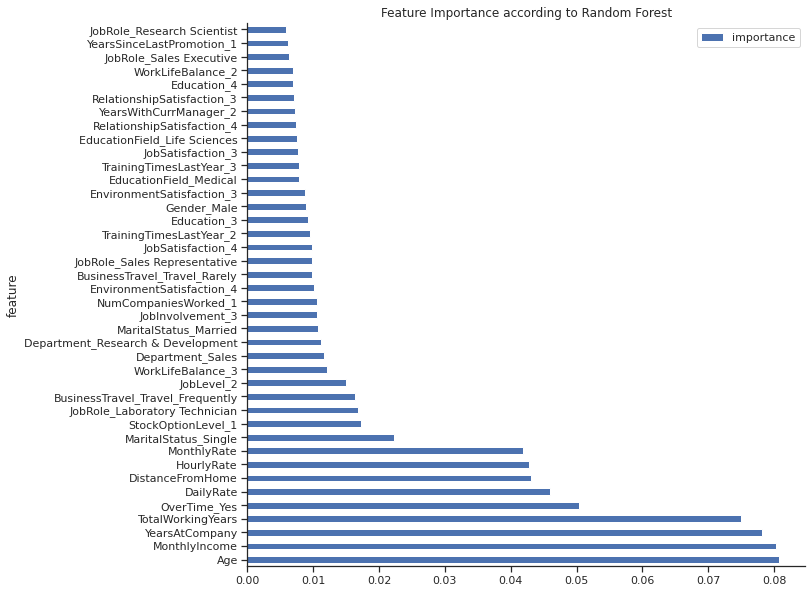

In [ ]:
print("\nCourbes d'évaluation :\n")
precisions, recalls, thresholds = precision_recall_curve(y_test, best_random_forest_model.predict(X_test_std))
fpr, tpr, thresholds = roc_curve(y_test, best_random_forest_model.predict(X_test_std))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_pr_curve(precisions,recalls)

plt.subplot(1, 2, 2)
plot_roc_curve(fpr, tpr)
plt.show()

compare = compare.append(best_random_forest_model_df)

print("\nImportance des variables :\n")
df = feature_imp(X, best_random_forest_model)[:40]
df.set_index('feature', inplace=True)
df.plot(kind='barh', figsize=(10, 10))
plt.title('Feature Importance according to Random Forest')
plt.show()

# XGBoost



XGBoost :

Nombre d'observations du jeu d'entrainement : 1176
dont 190 collaborateurs qui sont partis.

Nombre d'observations du jeu de test: 294
dont 47 collaborateurs qui sont partis.
Matrice de confusion :



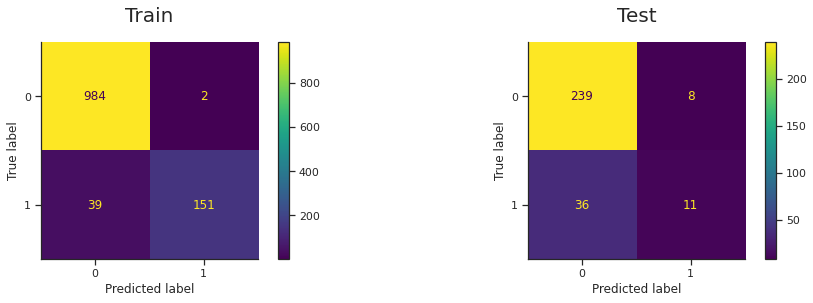


Métriques d'évaluation :



,model,jeu de données,precision,recall,accuracy,f1,AUC ROC
0,XGBClassifier,test,0.58,0.23,0.85,0.33,0.6
1,XGBClassifier,train,0.99,0.79,0.97,0.88,0.9


In [ ]:
print("\n==========================================")
print("XGBoost :")
print("==========================================\n")

# create the model
xgb_modele = XGBClassifier(learning_rate=0.01, n_estimators=2000, use_label_encoder=False, random_state=420)

# train the model
xgb_modele.fit(X_train, y_train)

# predict
y_train_pred = xgb_modele.predict(X_train)
y_test_pred = xgb_modele.predict(X_test)

print("Nombre d'observations du jeu d'entrainement : " + str(len(X_train)))
print("dont "+str(y_train.value_counts()[1])+" collaborateurs qui sont partis.")

print("\nNombre d'observations du jeu de test: " + str(len(X_test)))
print("dont "+str(y_test.value_counts()[1])+" collaborateurs qui sont partis.")

print("Matrice de confusion :\n")
plot_confusion_matrix(xgb_modele,  X_train, y_train, X_test, y_test)

print("\nMétriques d'évaluation :\n")
xgb_modele_df = evaluate(xgb_modele, X_train, y_train, X_test, y_test)
display(xgb_modele_df)
compare = compare.append(xgb_modele_df)


Courbes d'évaluation :



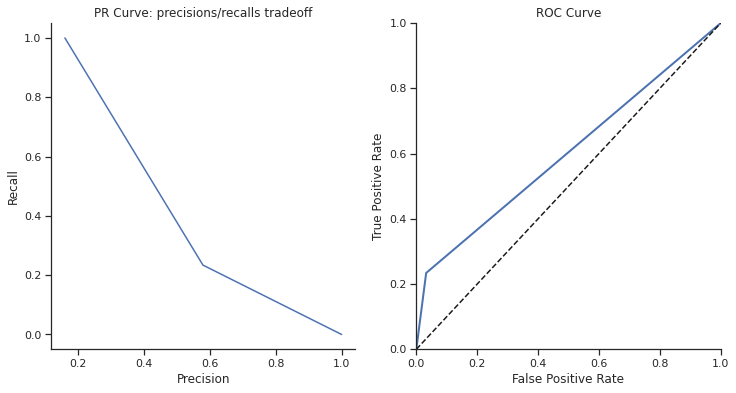


Importance des variables :



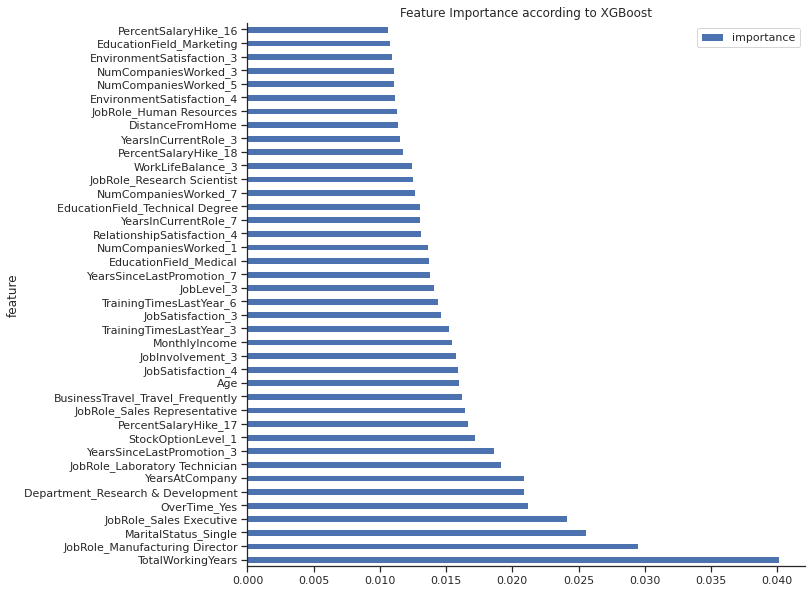

In [ ]:
print("\nCourbes d'évaluation :\n")
precisions, recalls, thresholds = precision_recall_curve(y_test, xgb_modele.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, xgb_modele.predict(X_test))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_pr_curve(precisions,recalls)

plt.subplot(1, 2, 2)
plot_roc_curve(fpr, tpr)
plt.show()

print("\nImportance des variables :\n")
df = feature_imp(X, xgb_modele)[:40]
df.set_index('feature', inplace=True)
df.plot(kind='barh', figsize=(10, 10))
plt.title('Feature Importance according to XGBoost')
plt.show()

# Model comparison

In [ ]:
display(compare[compare['jeu de données'] == 'test'])


,model,jeu de données,precision,recall,accuracy,f1,AUC ROC
0,LogisticRegression,test,0.53,0.43,0.85,0.47,0.68
0,RandomForestClassifier,test,0.60,0.06,0.84,0.12,0.53
0,XGBClassifier,test,0.58,0.23,0.85,0.33,0.60


# New data

In [ ]:
# new data
new_data = pd.read_csv("new_data.csv",sep=";")
new_data.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,23,Non-Travel,1334,Research & Development,2,5,Other,3,Male,36,...,3,3,0,3,0,3,2,2,2,0
1,31,Non-Travel,1252,Research & Development,15,5,Other,2,Female,81,...,4,4,0,7,0,2,3,3,3,3


In [ ]:
old_data = pd.read_csv("dataset.csv",sep=",")
old_data.drop(['Attrition', 'EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)

data = pd.concat([new_data, old_data])

In [ ]:
# one-hot encoding
dummy_col = [column for column in data.columns if data[column].nunique() < 20]
new_data = pd.get_dummies(data, columns=dummy_col, drop_first=True, dtype='uint8')

# sample data
new_data.head()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,TotalWorkingYears,YearsAtCompany,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,...,YearsWithCurrManager_8,YearsWithCurrManager_9,YearsWithCurrManager_10,YearsWithCurrManager_11,YearsWithCurrManager_12,YearsWithCurrManager_13,YearsWithCurrManager_14,YearsWithCurrManager_15,YearsWithCurrManager_16,YearsWithCurrManager_17
0,23,1334,2,36,1416,17258,3,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,31,1252,15,81,2700,23779,7,3,0,0,...,0,0,0,0,0,0,0,0,0,0
0,41,1102,1,94,5993,19479,8,6,0,1,...,0,0,0,0,0,0,0,0,0,0
1,49,279,8,61,5130,24907,10,10,1,0,...,0,0,0,0,0,0,0,0,0,0
2,37,1373,2,92,2090,2396,7,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
new_data.shape

(1472, 135)

In [ ]:
# select the first two lines that correspond to new data
new_data = new_data.iloc[[0,1],:]
new_data.head()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,TotalWorkingYears,YearsAtCompany,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,...,YearsWithCurrManager_8,YearsWithCurrManager_9,YearsWithCurrManager_10,YearsWithCurrManager_11,YearsWithCurrManager_12,YearsWithCurrManager_13,YearsWithCurrManager_14,YearsWithCurrManager_15,YearsWithCurrManager_16,YearsWithCurrManager_17
0,23,1334,2,36,1416,17258,3,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,31,1252,15,81,2700,23779,7,3,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# standardize features by removing the mean and scaling to unit variance
X_new_std = scaler.transform(new_data)

In [ ]:
# predictions
y_new_pred = logistic_model.predict(X_new_std)
print(y_new_pred)

[0 0]
